In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mirella Glowinska C00275764

Dataset source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data

In [27]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Datasets/Telco-Customer-Churn.csv')

print("------------------------------------------------------------------------------")
print("First 5 rows of the dataset:")
print(df.head())
print("------------------------------------------------------------------------------")
# (rows, columns)
print(f"Shape of dataset: {df.shape}")
print("------------------------------------------------------------------------------")
print("Minimum values:")
print(df.min(numeric_only=True))
print("------------------------------------------------------------------------------")
print("\nMaximum values:")
print(df.max(numeric_only=True))
print("------------------------------------------------------------------------------")
print(df.describe())
print("------------------------------------------------------------------------------")
print("Columns:", df.columns.tolist())


------------------------------------------------------------------------------
First 5 rows of the dataset:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber o

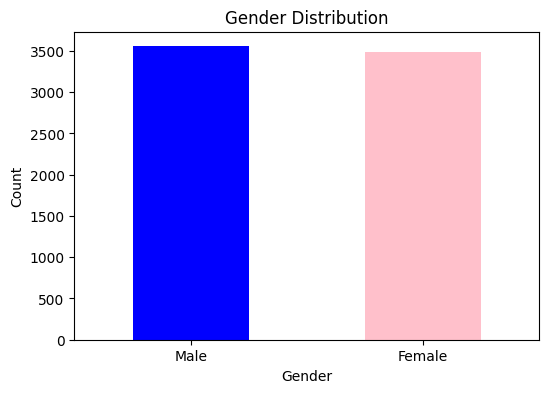

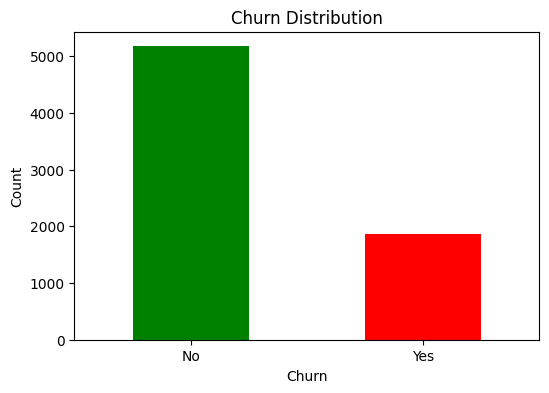

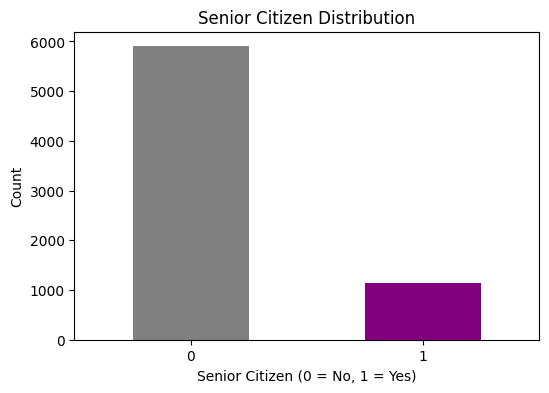

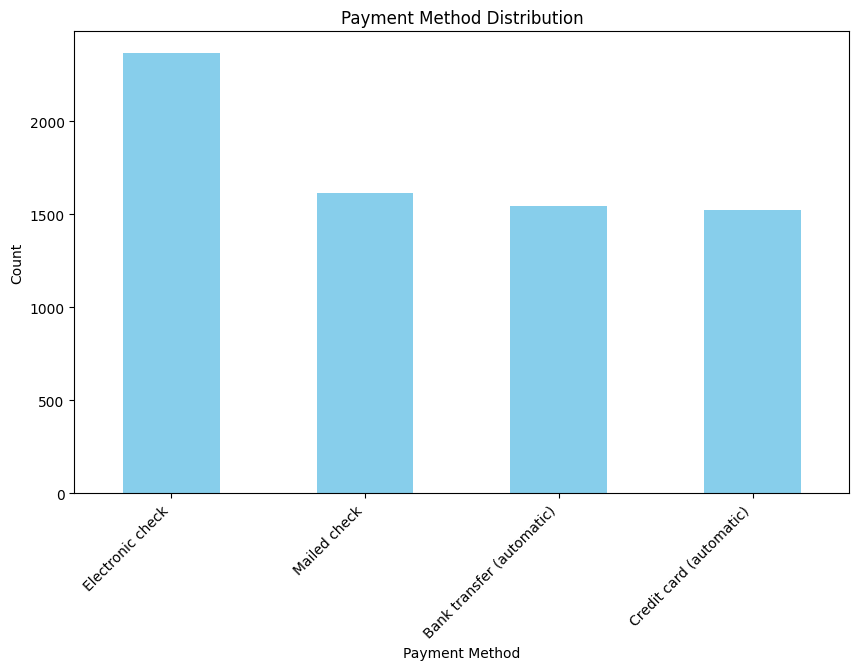

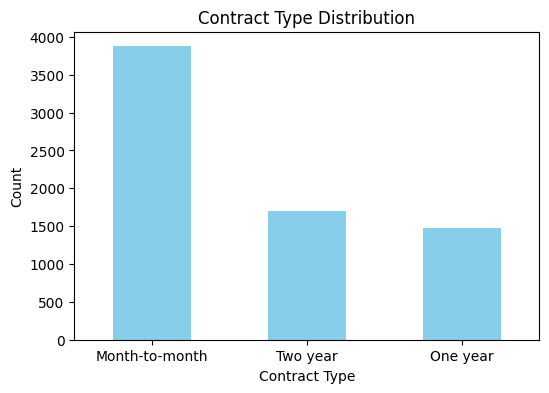

In [28]:
import matplotlib.pyplot as plt

gender_counts = df['gender'].value_counts()

plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(6, 4))
churn_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

senior_citizen_counts = df['SeniorCitizen'].value_counts()
plt.figure(figsize=(6, 4))
senior_citizen_counts.plot(kind='bar', color=['grey', 'purple'])
plt.title('Senior Citizen Distribution')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

payment_method_counts = df['PaymentMethod'].value_counts()
plt.figure(figsize=(10, 6))
payment_method_counts.plot(kind='bar', color='skyblue')
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

contract_counts = df['Contract'].value_counts()
plt.figure(figsize=(6, 4))
contract_counts.plot(kind='bar', color='skyblue')
plt.title('Contract Type Distribution')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

KNN: https://medium.com/@amirm.lavasani/classic-machine-learning-in-python-k-nearest-neighbors-knn-a06fbfaaf80a

GridSearch: https://towardsdatascience.com/gridsearchcv-for-beginners-db48a90114ee/

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, roc_auc_score)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

df.drop('customerID', axis=1, inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("class distribution before SMOTE:")
print(y_train.value_counts())

numerical_cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

smote = SMOTE(sampling_strategy=0.5, random_state=42)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('smote', smote),
    ('classifier', KNeighborsClassifier())
])

param_grid = {
    'classifier__n_neighbors': [5, 10, 15],
    'classifier__weights': ['uniform', 'distance']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_

y_pred = best_knn.predict(X_test)
y_proba = best_knn.predict_proba(X_test)[:, 1]

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))



class distribution before SMOTE:
Churn
0    4139
1    1495
Name: count, dtype: int64
Fitting 5 folds for each of 6 candidates, totalling 30 fits


<ipython-input-29-e8c454a0875e>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


Best Parameters: {'classifier__n_neighbors': 15, 'classifier__weights': 'uniform'}
Accuracy: 0.7615330021291696
Confusion Matrix:
 [[815 220]
 [116 258]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.79      0.83      1035
           1       0.54      0.69      0.61       374

    accuracy                           0.76      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.76      0.77      1409

ROC-AUC Score: 0.8178395205249427


In [ ]:
import joblib

# Save the model
joblib.dump(grid_search.best_estimator_, 'churn_model.pkl')

model = joblib.load('churn_model.pkl')
print(model)

from google.colab import files
files.download('churn_model.pkl')

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['SeniorCitizen', 'tenure',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                               

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>